In [75]:
!pip install wordcloud
import spacy
import pandas as pd
nlp=spacy.load('en_core_web_sm')
df = pd.read_csv('tweets.csv', encoding='ISO-8859-1')
df.shape
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,RT @rssurjewala: Critical question: Was PayTM ...,False,0.0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331.0,True,False
1,RT @Hemant_80: Did you vote on #Demonetization...,False,0.0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66.0,True,False
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0.0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12.0,True,False
3,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0.0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338.0,True,False
4,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0.0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120.0,True,False


In [76]:
combined_tweets=' '.join(df.text.values)
# Creating Doc object
doc=nlp(combined_tweets)

In [77]:
# Function for generating word frequency
def gen_freq(tokens):
    
    # Creating a pandas series with word frequencies
    word_freq = pd.Series([token.text for token in tokens]).value_counts()
    
    # Printing frequencies
    print(word_freq[:20])
    
    return word_freq

word_freq = gen_freq(doc)

#                 5770
demonetization    2523
.                 2318
:                 2048
Demonetization    2003
,                 1735
to                1659
                 1642
the               1593
of                1588
RT                1371
in                1343
\r\n              1288
is                1088
on                 946
a                  816
?                  723
and                711
India              685
's                 664
dtype: int64


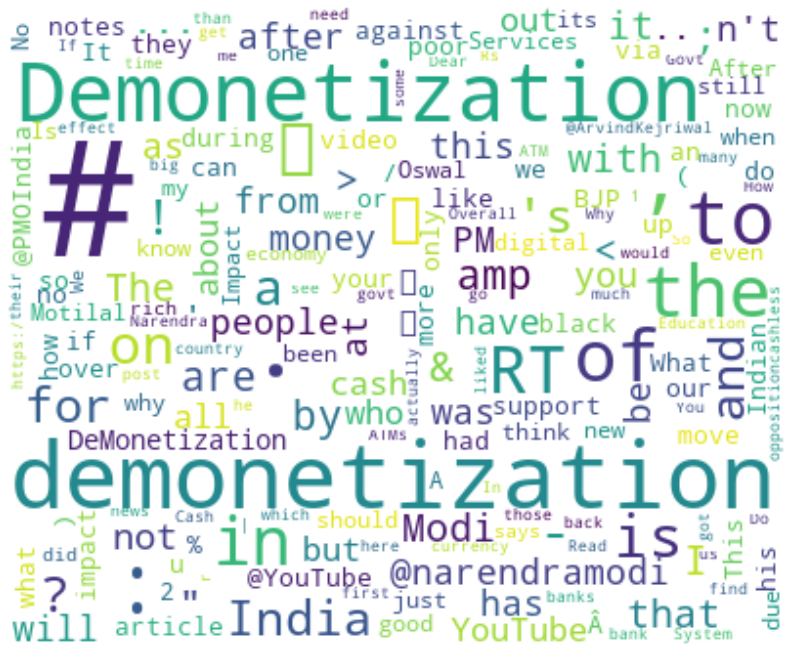

In [78]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function for generating wordcloud
def generate_wordcloud(data):
    # Creating a wordcloud
    wc = WordCloud(width=400, height=330, max_words=200,background_color='white').generate_from_frequencies(data)
    
    # Setting Figure Size
    plt.figure(figsize=(14,12))
    
    # Display wordcloud as image
    plt.imshow(wc, interpolation='bilinear')
    
    # Removing all the axes
    plt.axis("off")
    
    plt.show()
generate_wordcloud(word_freq)


In [82]:
#print(combined_tweets)
combined_tweets=re.sub('(RT|#|@)','',combined_tweets)
combined_tweets=re.sub('(\r\n|amp|<|>)+','',combined_tweets)
combined_tweets=combined_tweets.lower()
doc=nlp(combined_tweets)
tokens=[d for d in doc if(d.is_stop==False | d.is_punct==False | d.is_space == False)]

In [83]:
word_freq=gen_freq(tokens)

demonetization    4525
india              698
youtube            390
modi               388
narendramodi       352
money              317
people             308
pm                 288
cash               281
impact             183
like               162
black              160
digital            151
support            146
govt               128
u                  127
bjp                122
indian             119
new                118
video              117
dtype: int64


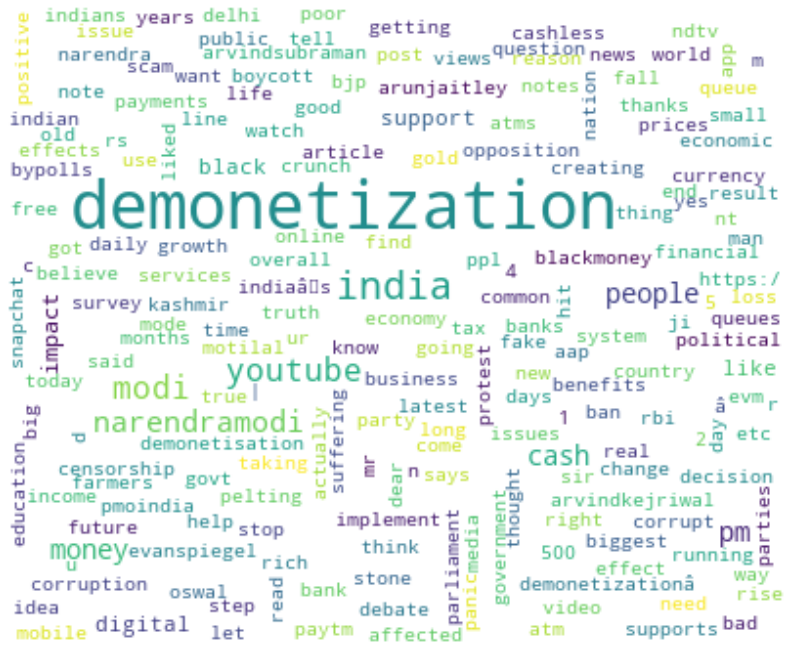

In [84]:
generate_wordcloud(word_freq)